### This is the dataset of restaurants available on swiggy . Lets find some valuable insights from this 

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
df = pd.read_csv(r'D:\DS class\Final Projects\swiggy.csv')
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [6]:
df.shape

(8680, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


In [8]:
df.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


In [9]:
# Lets find frequency for each price value
price_range = df['Price'].value_counts()

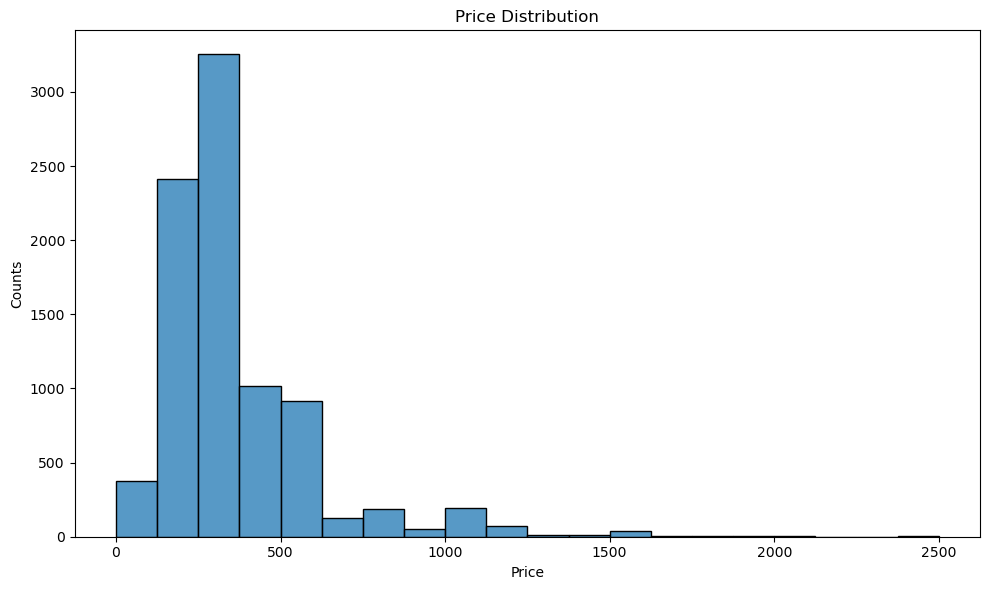

In [10]:
# lets see the frequency of unique price value 
plt.figure(figsize = (10,6))
sns.histplot(df['Price'], kde = False, bins = 20) 
plt.xlabel('Price')
plt.ylabel('Counts')
plt.title('Price Distribution')
plt.tight_layout()
plt.show()

In [11]:
price_range.head()

Price
300.0    1776
200.0    1774
250.0     968
400.0     838
500.0     605
Name: count, dtype: int64

#### Exploratory Data analysis 

In [13]:
top10 = df['Area'].value_counts().head(10)

In [14]:
top10

Area
Rohini          257
Chembur         208
Kothrud         149
Andheri East    135
Navrangpura     132
Indiranagar     130
Kurla           129
Koramangala     124
Bidhannagar     123
Ashok Nagar     118
Name: count, dtype: int64

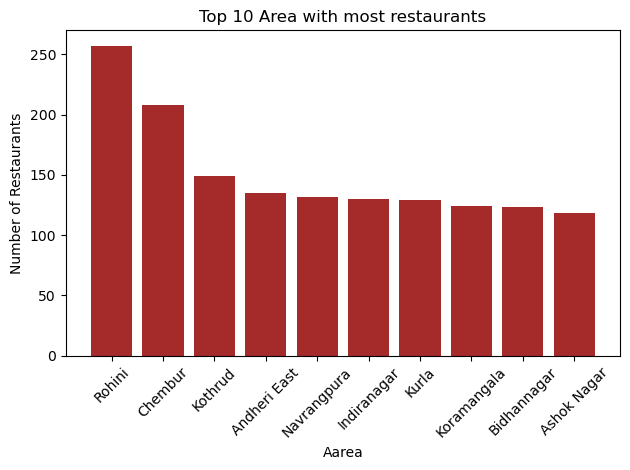

In [15]:
plt.bar(top10.index,top10.values,color = 'brown')
plt.title('Top 10 Area with most restaurants')
plt.xlabel('Aarea')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Compare to other area ROHINI and CHEMBUR has more restaurants

In [40]:
# Grouping and sorting the data 
most_popular_food = df.groupby(['City', 'Food type'])['ID'].count().reset_index()
most_popular_food = most_popular_food.sort_values(by=['City', 'ID'], ascending=[True, False])
most_popular_food = most_popular_food.drop_duplicates(subset='City')
most_popular_food

,City,Food type,ID
172,Ahmedabad,Indian,53
977,Bangalore,South Indian,32
1402,Chennai,Indian,56
1952,Delhi,North Indian,47
2623,Hyderabad,South Indian,76
3113,Kolkata,Indian,66
3601,Mumbai,Chinese,64
4347,Pune,Chinese,48
4930,Surat,Fast Food,40


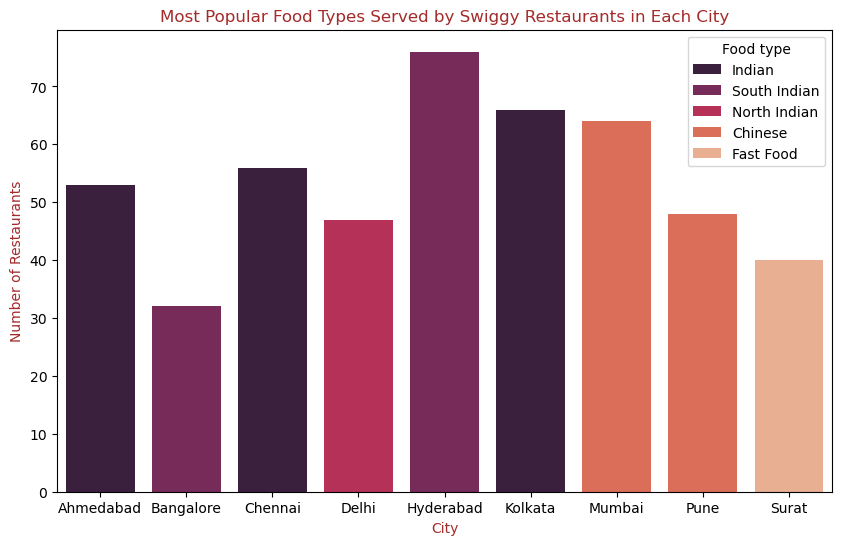

In [221]:
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='ID', hue='Food type', data=most_popular_food , palette="rocket")
plt.title('Most Popular Food Types Served by Swiggy Restaurants in Each City', color='brown')
plt.xlabel('City', color='brown')
plt.ylabel('Number of Restaurants', color='brown')

plt.show()

### Indian food type is mostly consumed by people 

In [138]:
# Split data based on ratings
ratings_above45= df[df['Avg ratings'] > 4.5]
ratings_below45 = df[df['Avg ratings'] <= 4.5]

In [140]:
# Calculate the percentages
percentage_above45 = (len(ratings_above45) / len(df)) * 100
percentage_below45 = 100 - percentage_above45

In [176]:
#pie chart
label = ['Above 4.5', '4.5 and Below']
sizes = [percentage_above45, percentage_below45]
# colors for the slices
colors = ['#9B2D20','#B65FCF']  

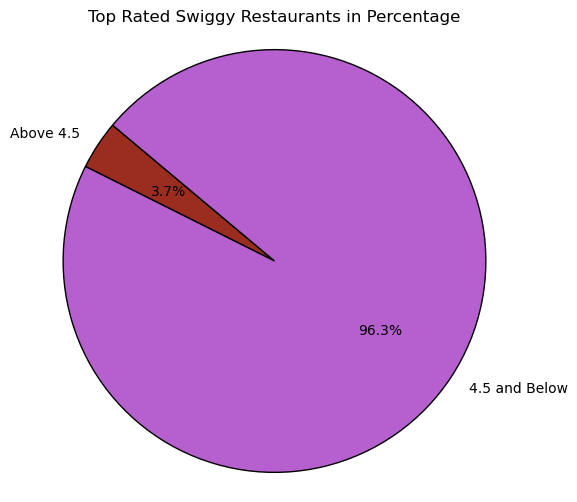

In [228]:
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=label, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'color': 'black'}, wedgeprops={'edgecolor': 'black'})
plt.axis('equal')
plt.title('Top Rated Swiggy Restaurants in Percentage', color='black')
plt.show()

### 96.3% restaurants have rating less than 4.5

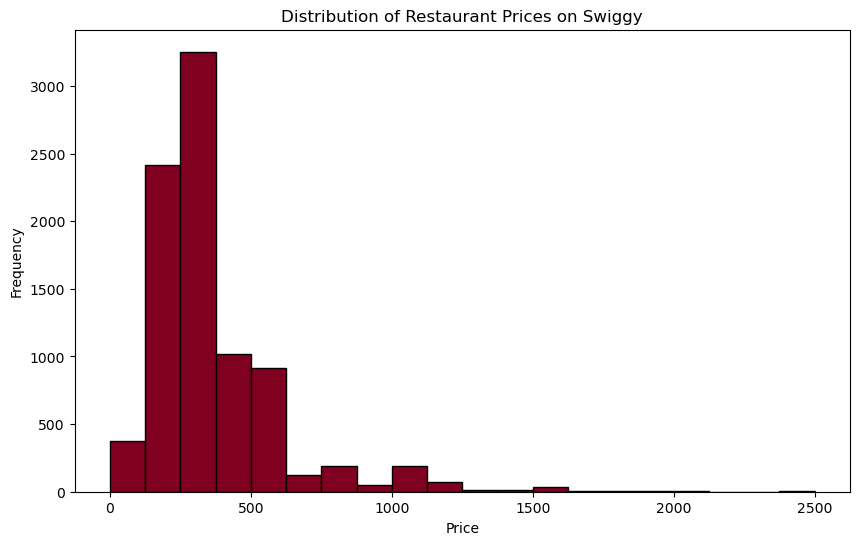

In [235]:
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=20, color='#800020', edgecolor='black')  # Red bars with black edges
plt.title('Distribution of Restaurant Prices on Swiggy')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

### Restaurants price tends to be between 100rs to 1500rs it seems like the affordable range of restuarants are present on swiggy 

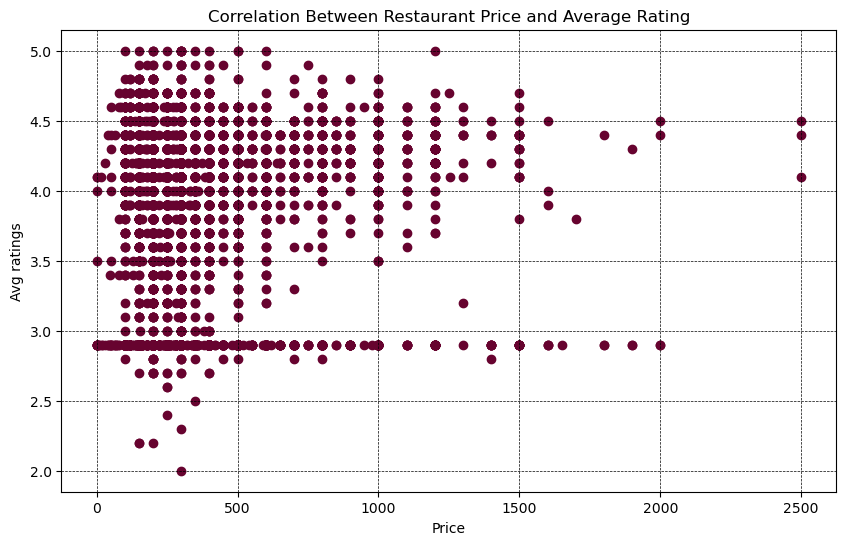

In [218]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['Avg ratings'], color='#67032F')
plt.title('Correlation Between Restaurant Price and Average Rating')
plt.xlabel('Price')
plt.ylabel('Avg ratings')

#Grid and ticks color
plt.grid(True, color='black', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', labelcolor='black')
plt.show()

#### The ratings of restaurants does not depend on price because here we can see that the resturaants having rates between 500 also has ratings above 4.5 
 -  It is because the reastaurants are serving good

#### The restaurants that has rates above 2000rs  also has good ratings upto 4.5.